In [1]:
pip install scipy statsmodels scikit-learn numpy pandas matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df1 = pd.read_csv("../Data Model/US_Model.csv")
df2 = pd.read_csv("../Data Model/EU_Model.csv")
df3 = pd.read_csv("../Data Model/IN_Model.csv")

X1 = sm.add_constant(df1['GARCH_Volatility'])
X2 = sm.add_constant(df2['GARCH_Volatility'])
X3 = sm.add_constant(df3['GARCH_Volatility'])
dependent_var1 = np.log(df1['Theoretical_Spread'])
dependent_var2 = np.log(df2['Theoretical_Spread'])
dependent_var3 = np.log(df3['Theoretical_Spread'])
model1 = sm.OLS(dependent_var1, X1).fit()
model2 = sm.OLS(dependent_var2, X2).fit()
model3 = sm.OLS(dependent_var3, X3).fit()

print("USA")
print(model1.summary())
print("Europe")
print(model2.summary())
print("India")
print(model3.summary())

USA
                            OLS Regression Results                            
Dep. Variable:     Theoretical_Spread   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     3239.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:40:16   Log-Likelihood:                 628.21
No. Observations:                1095   AIC:                            -1252.
Df Residuals:                    1093   BIC:                            -1242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6347      0.0

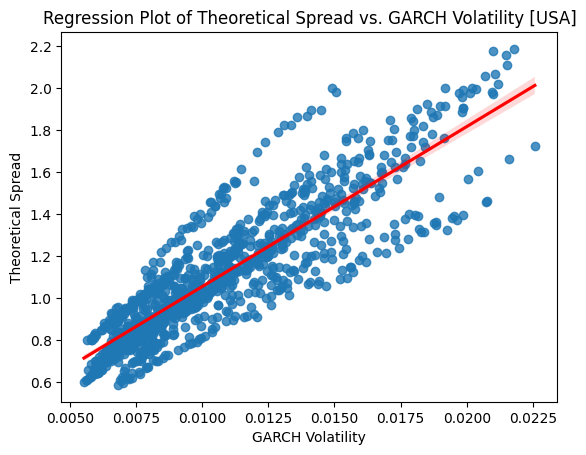

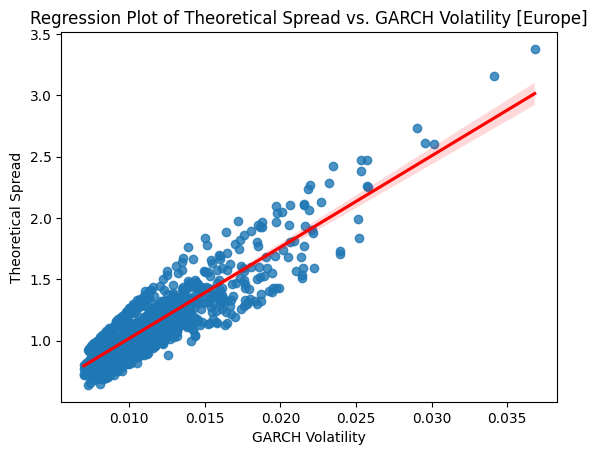

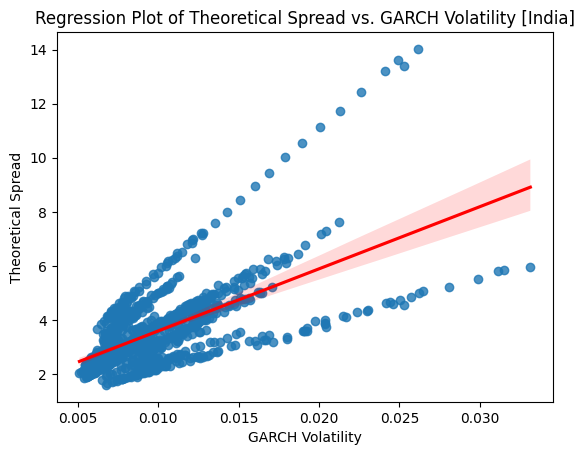

In [12]:
import seaborn as sns

sns.regplot(x='GARCH_Volatility', y='Theoretical_Spread', data=df1, line_kws={'color': 'red'})
plt.xlabel('GARCH Volatility')
plt.ylabel('Theoretical Spread')
plt.title('Regression Plot of Theoretical Spread vs. GARCH Volatility [USA]')
plt.show()
sns.regplot(x='GARCH_Volatility', y='Theoretical_Spread', data=df2, line_kws={'color': 'red'})
plt.xlabel('GARCH Volatility')
plt.ylabel('Theoretical Spread')
plt.title('Regression Plot of Theoretical Spread vs. GARCH Volatility [Europe]')
plt.show()
sns.regplot(x='GARCH_Volatility', y='Theoretical_Spread', data=df3, line_kws={'color': 'red'})
plt.xlabel('GARCH Volatility')
plt.ylabel('Theoretical Spread')
plt.title('Regression Plot of Theoretical Spread vs. GARCH Volatility [India]')
plt.show()

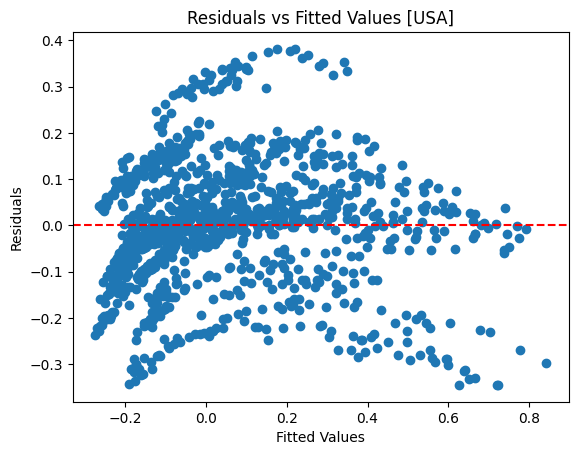

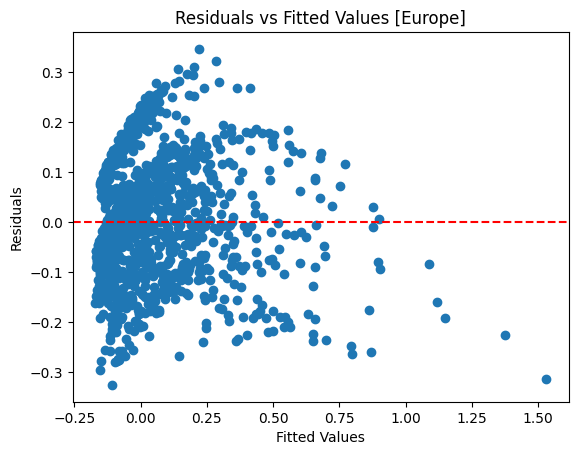

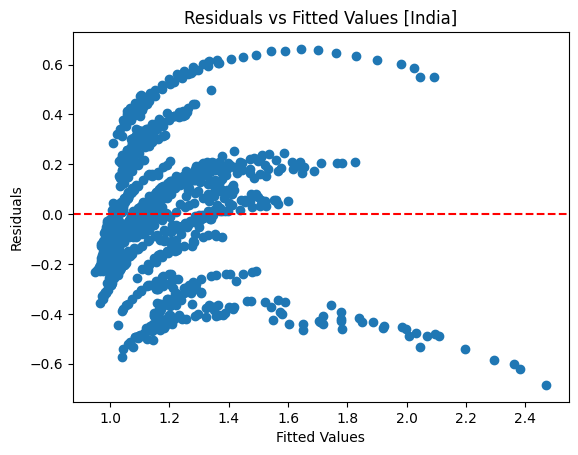

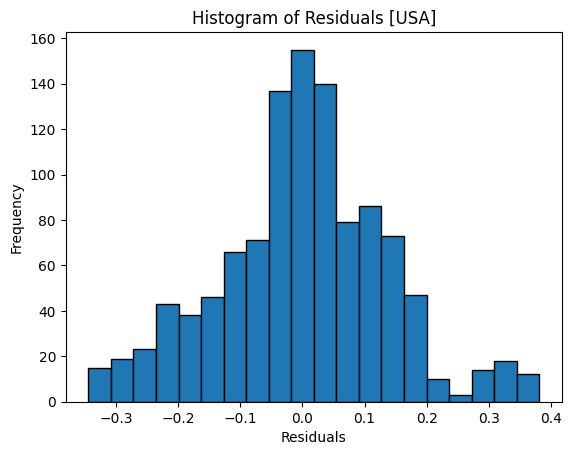

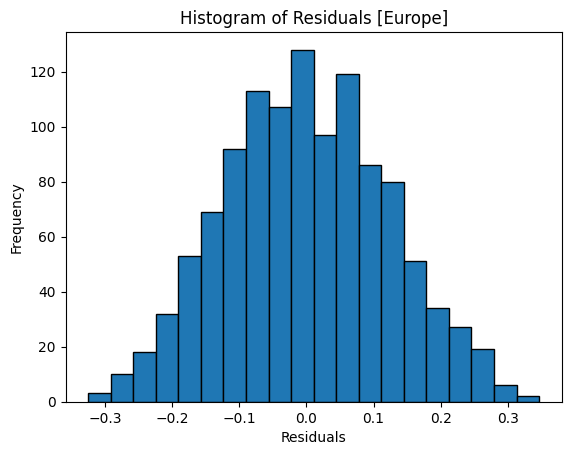

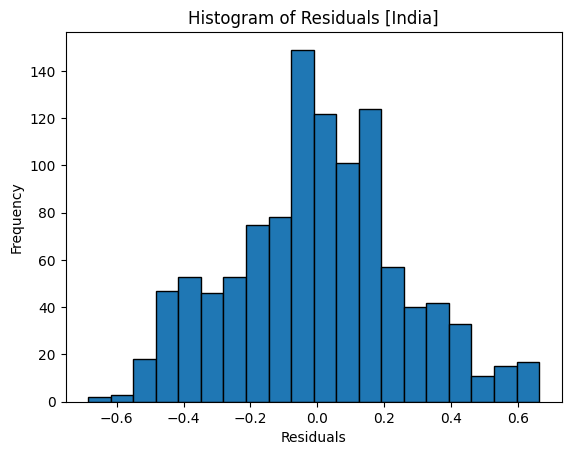

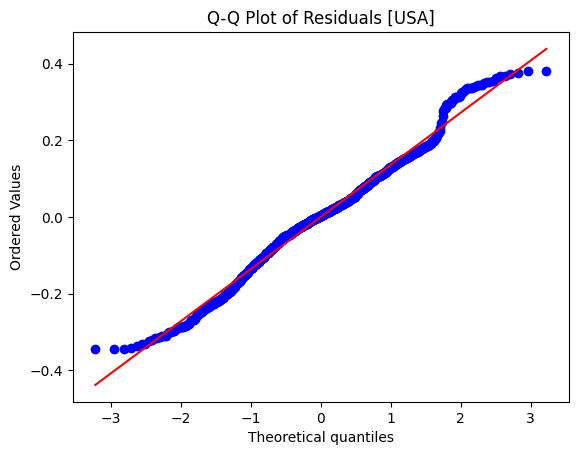

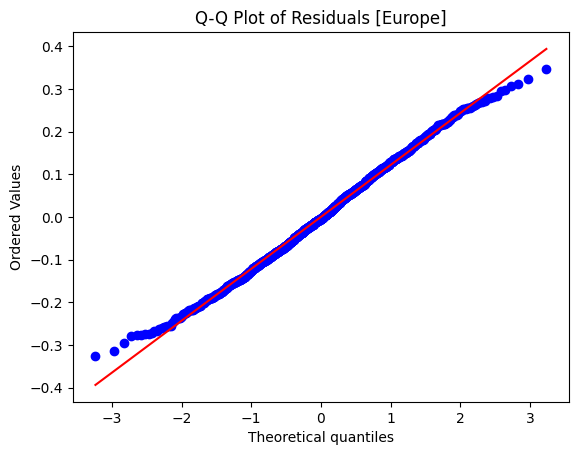

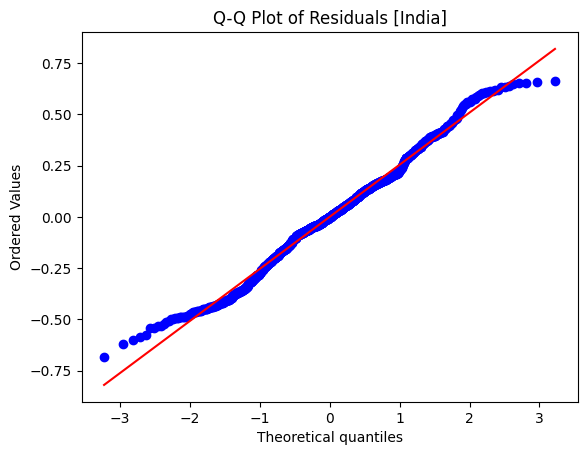

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
residuals1 = model1.resid
residuals2 = model2.resid
residuals3 = model3.resid

fitted_values1 = model1.fittedvalues
plt.scatter(fitted_values1, residuals1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values [USA]')
plt.show()

fitted_values2 = model2.fittedvalues
plt.scatter(fitted_values2, residuals2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values [Europe]')
plt.show()

fitted_values3 = model3.fittedvalues
plt.scatter(fitted_values3, residuals3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values [India]')
plt.show()

plt.hist(residuals1, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals [USA]')
plt.show()

plt.hist(residuals2, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals [Europe]')
plt.show()

plt.hist(residuals3, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals [India]')
plt.show()

stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals [USA]')
plt.show()

stats.probplot(residuals2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals [Europe]')
plt.show()

stats.probplot(residuals3, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals [India]')
plt.show()

In [3]:
from statsmodels.tsa.stattools import grangercausalitytests
print("USA")
grangercausalitytests(df1[['GARCH_Volatility','Theoretical_Spread']], maxlag=2)
print("Europe")
grangercausalitytests(df2[['GARCH_Volatility','Theoretical_Spread']], maxlag=2)
print("India")
grangercausalitytests(df3[['GARCH_Volatility','Theoretical_Spread']], maxlag=2)

USA

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6996  , p=0.1007  , df_denom=1091, df_num=1
ssr based chi2 test:   chi2=2.7071  , p=0.0999  , df=1
likelihood ratio test: chi2=2.7037  , p=0.1001  , df=1
parameter F test:         F=2.6996  , p=0.1007  , df_denom=1091, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.4186 , p=0.0000  , df_denom=1088, df_num=2
ssr based chi2 test:   chi2=28.9697 , p=0.0000  , df=2
likelihood ratio test: chi2=28.5924 , p=0.0000  , df=2
parameter F test:         F=14.4186 , p=0.0000  , df_denom=1088, df_num=2
Europe

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.1279 , p=0.0000  , df_denom=1142, df_num=1
ssr based chi2 test:   chi2=18.1755 , p=0.0000  , df=1
likelihood ratio test: chi2=18.0328 , p=0.0000  , df=1
parameter F test:         F=18.1279 , p=0.0000  , df_denom=1142, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.6

{1: ({'ssr_ftest': (3.2443835810908337, 0.0719469757524815, 1082.0, 1),
   'ssr_chi2test': (3.2533790993378506, 0.0712763751728589, 1),
   'lrtest': (3.248511189374767, 0.0714883646077037, 1),
   'params_ftest': (3.244383581091029, 0.07194697575247569, 1082.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.2189812531564819, 0.29593773503079285, 1079.0, 2),
   'ssr_chi2test': (2.4492598302532462, 0.293866435724283, 2),
   'lrtest': (2.446496983002362, 0.2942726702877262, 2),
   'params_ftest': (1.218981253149809, 0.2959377350327418, 1079.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = df1[['GARCH_Volatility','Daily_STIR']]
X2 = df2[['GARCH_Volatility','Daily_STIR']]
X3 = df3[['GARCH_Volatility','Daily_STIR']]

vif1 = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif2 = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif3 = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]

df_vif = pd.DataFrame({'Variable': ['GARCH_Volatility', 'Daily_STIR'], "USA_VIF": vif1, "Europe_VIF":vif2, "India_VIF": vif3})
print(df_vif.to_csv(sep='\t', index=False, float_format='%.4f'))

Variable	USA_VIF	Europe_VIF	India_VIF
GARCH_Volatility	1.5979	1.2739	4.1026
Daily_STIR	1.5979	1.2739	4.1026

